## Beautiful Demo

Loads training data and shows an example training face

In [1]:
from matplotlib import pyplot as plt
from read_data import training_validation

from time import time
from random import choice

(training_images, training_labels), (test_images, test_labels) = training_validation()

sample_image_positive = choice(training_images)
sample_image_negative = choice(test_images)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(sample_image_positive)
ax2.imshow(sample_image_negative)
plt.show()



reading csv: 6.384876012802124
formatting to numpy matrices: 6.332572937011719
picking random data: 0.013900041580200195
Formatting data: 2.5987625122070312e-05


## Example of feature selection used

-0.0003734353208
-0.144102583487
0.0147109250307
4.84778650519
4.77072208608


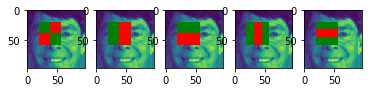

In [2]:
from features import *
from processing import IntegralImage

fsize = FeatureSize(0.2, 0.2, 0.4, 0.4)
ii = IntegralImage(sample_image_positive)
ii.process()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

f = Feature(fsize, A)
f.print_feature(ii, ax1)
print(f.calculate(ii))

f = Feature(fsize, B1)
f.print_feature(ii, ax2)
print(f.calculate(ii))

f = Feature(fsize, B2)
f.print_feature(ii, ax3)
print(f.calculate(ii))

f = Feature(fsize, C1)
f.print_feature(ii, ax4)
print(f.calculate(ii))

f = Feature(fsize, C2)
f.print_feature(ii, ax5)
print(f.calculate(ii))


plt.show()

## Example of Feature Generation

In [3]:
from features import *
count = 0
for sz in generate_all_sizes():
    count += 1
print(count)

225


## Format training and test data

The format is adapted for the special ada boosted version, to extract features, therefore to train the normal bayes
we have to transpose the data to get image x features instead of features x images.

In [ ]:
from read_data import get_trainable_data
training, test, IItraining, IItest, all_features, outTrain, outTest = get_trainable_data(training_images, test_images)

Stage 1e all features: 0.002399921417236328
Processing all integral images: 139.42981791496277


## Display of Integral Image

In [ ]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(IItraining[0].ii)
ax2.imshow(IItraining[200].ii)
ax3.imshow(IItraining[400].ii)

plt.show()


## Testing Naive Bayes 

Naive bayes based on Normal distribution

In [ ]:
from naive_bayes import naive_bayes
from wrapper_for_bayes import wrapper
from tests import simple

# Bayes is weak when there's to many features.
training_for_bayes = training[500:510].T
test_for_bayes = test[500:510].T


classifier = naive_bayes()
classifier.train(training_for_bayes, training_labels)

# Wrap it so it remembers it features so it can be used in detector later

bayes_features = all_features[500:510]
bayes = wrapper(classifier, bayes_features)

p = plt.subplots(1, 2)

simple(bayes, IItest, test_labels, test_images, p)

plt.show()


## Example of a single feature boosted classifier

A bunch of these are combined in the cascade

In [ ]:
from ada_boost import boosted_classifier
from tests import simple

# Constructor takes num of features
boost = boosted_classifier(10)
boost.train(training, all_features, training_labels)
p = plt.subplots(1, 2)

simple(boost, IItest, test_labels, test_images, p)

plt.show()



## The one and only... Cascade

In [ ]:
from cascade import cascade
from tests import simple

# Argument zero is False positive improvement, arg one is minimal success rate

c = cascade(0.20, 0.97)
print("Hi")

# Last arg is target False negative improvement
c.train(IItraining, training_labels, 0.005)

p = plt.subplots(1, 2)

simple(c, IItest, test_labels, test_images, p)

plt.show()


## Comparison in Object detection using sliding window

In [ ]:
from detector import detector
from processing import load_image, grey_scale


window_start_dim = (20, 20)
window_stop_dim = (100, 100)
size_increase = 2
stride = 10


bayes_detector = detector(window_start_dim, window_stop_dim, size_increase, stride, bayes)
boost_detector = detector(window_start_dim, window_stop_dim, size_increase, stride, boost)
cascade_detector = detector(window_start_dim, window_stop_dim, size_increase, stride, c)


im_path = "/Users/jonasvalfridsson/me/singularity/RRTOD/beatles3.jpg"

image = grey_scale(load_image(im_path))

bsfig, bs = plt.subplots(1, 1)
bofig, bo = plt.subplots(1, 1)
cafig, ca = plt.subplots(1, 1)


bayes_detector.detect(image, bs)
boost_detector.detect(image, bo)
cascade_detector.detect(image, ca)

bs.imshow(image)
bo.imshow(image)
ca.imshow(image)

plt.show()
